In [1]:
using ModelingToolkit
using MethodOfLines, DomainSets, NonlinearSolve
using Plots

# 2D Heat Transfer - Steady State Heat Equation 

# With Dirichlet BCS

In [36]:
@parameters x y
@variables u(..)
Dxx = Differential(x)^2
Dyy = Differential(y)^2



Differential(y) ∘ Differential(y)

In [37]:
eq = Dxx(u(x, y)) + Dyy(u(x, y)) ~ 0



Differential(x)(Differential(x)(u(x, y))) + Differential(y)(Differential(y)(u(x, y))) ~ 0

In [38]:
# bcs = [u(0, y) ~ x * y,
#        u(1, y) ~ x * y,
#        u(x, 0) ~ x * y,
#        u(x, 1) ~ x * y]
bcs = [u(0, y) ~ 0,
       u(1, y) ~ 0,
       u(x, 0) ~ 1,
       u(x, 1) ~ 0]



4-element Vector{Equation}:
 u(0, y) ~ 0
 u(1, y) ~ 0
 u(x, 0) ~ 1
 u(x, 1) ~ 0

In [39]:
# Space and time domains
domains = [x ∈ Interval(0.0, 1.0),
           y ∈ Interval(0.0, 1.0)]



2-element Vector{Symbolics.VarDomainPairing}:
 Symbolics.VarDomainPairing(x, 0.0..1.0)
 Symbolics.VarDomainPairing(y, 0.0..1.0)

In [40]:
@named pdesys = PDESystem([eq], bcs, domains, [x, y], [u(x, y)])



PDESystem
Equations: Equation[Differential(x)(Differential(x)(u(x, y))) + Differential(y)(Differential(y)(u(x, y))) ~ 0]
Boundary Conditions: Equation[u(0, y) ~ 0, u(1, y) ~ 0, u(x, 0) ~ 1, u(x, 1) ~ 0]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(x, 0.0..1.0), Symbolics.VarDomainPairing(y, 0.0..1.0)]
Dependent Variables: Num[u(x, y)]
Independent Variables: Num[x, y]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [41]:
dx = 0.1
dy = 0.1

# Note that we pass in `nothing` for the time variable `t` here since we
# are creating a stationary problem without a dependence on time, only space.
discretization = MOLFiniteDifference([x => dx, y => dy], nothing, approx_order=2)



MOLFiniteDifference{MethodOfLines.CenterAlignedGrid}(Pair{Num, Float64}[x => 0.1, y => 0.1], nothing, 2, UpwindScheme(1), MethodOfLines.CenterAlignedGrid(), Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}())

In [42]:
prob = discretize(pdesys, discretization)
sol = NonlinearSolve.solve(prob, NewtonRaphson())



u: Dict{Num, Matrix{Float64}} with 1 entry:
  u(x, y) => [0.0 0.0 … 0.0 0.0; 1.0 0.488925 … 0.011075 0.0; … ; 1.0 0.488925 …

In [43]:
u_sol = sol[u(x, y)]

11×11 Matrix{Float64}:
 0.0  0.0       0.0       0.0       0.0       …  0.0        0.0        0.0
 1.0  0.488925  0.28091   0.178837  0.120344     0.0233065  0.011075   0.0
 1.0  0.67479   0.455876  0.314095  0.219651     0.0441237  0.0209934  0.0
 1.0  0.75436   0.55371   0.402016  0.289963     0.0603909  0.028775   0.0
 1.0  0.788942  0.602586  0.450296  0.330988     0.0706811  0.0337156  0.0
 1.0  0.79882   0.617397  0.465596  0.344393  …  0.0741954  0.0354077  0.0
 1.0  0.788942  0.602586  0.450296  0.330988     0.0706804  0.0337106  0.0
 1.0  0.75436   0.55371   0.402016  0.289963     0.0603934  0.0287904  0.0
 1.0  0.67479   0.455876  0.314095  0.219651     0.0441186  0.0209663  0.0
 1.0  0.488925  0.28091   0.178837  0.120344     0.0233115  0.0110991  0.0
 0.0  0.0       0.0       0.0       0.0       …  0.0        0.0        0.0

In [44]:
# heatmap(sol[x], sol[y], u_sol, xlabel="x values", ylabel="y values",
#         title="Steady State Heat Equation")

## CFD Domain BC ..

In [4]:
@parameters x y
@variables u(..)
Dxx = Differential(x)^2
Dyy = Differential(y)^2

eq = Dxx(u(x, y)) + Dyy(u(x, y)) ~ 0

Differential(x)(Differential(x)(u(x, y))) + Differential(y)(Differential(y)(u(x, y))) ~ 0

In [5]:
Dy = Differential(y)
Dx = Differential(x)

Tinlet = 3
Tground = Tinlet*0.75

bcs = [Dx(u(1, y)) ~ 0,
     Dx(u(x, 1)) ~ 0,
     u(0, y) ~ Tinlet,
     u(x, 0) ~ Tground]

4-element Vector{Equation}:
 Differential(x)(u(1, y)) ~ 0
 Differential(x)(u(x, 1)) ~ 0
 u(0, y) ~ 3
 u(x, 0) ~ 2.25

In [6]:
# Space and time domains
domains = [x ∈ Interval(0.0, 1.0),
           y ∈ Interval(0.0, 1.0)]

@named pdesys = PDESystem([eq], bcs, domains, [x, y], [u(x, y)])

dx = 0.1
dy = 0.1

# Note that we pass in `nothing` for the time variable `t` here since we
# are creating a stationary problem without a dependence on time, only space.
discretization = MOLFiniteDifference([x => dx, y => dy], nothing, approx_order=2)

MOLFiniteDifference{MethodOfLines.CenterAlignedGrid}(Pair{Num, Float64}[x => 0.1, y => 0.1], nothing, 2, UpwindScheme(1), MethodOfLines.CenterAlignedGrid(), Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}())

In [7]:
prob = discretize(pdesys, discretization)
sol = NonlinearSolve.solve(prob, NewtonRaphson())

u_sol = sol[u(x, y)]

InterruptException: InterruptException:

In [ ]:

# using Plots

# heatmap(sol[x], sol[y], u_sol, xlabel="x values", ylabel="y values",
#         title="Steady State Heat Equation with Neumann BCs")

# 1D Transient Neumman Boundary Conditions

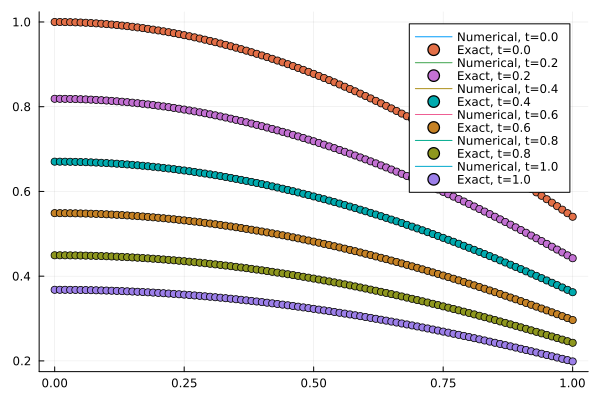

In [3]:
using OrdinaryDiffEq, ModelingToolkit, MethodOfLines, DomainSets
# Method of Manufactured Solutions: exact solution
u_exact = (x,t) -> exp.(-t) * cos.(x)

# Parameters, variables, and derivatives
@parameters t x
@variables u(..)
Dt = Differential(t)
Dx = Differential(x)
Dxx = Differential(x)^2

# 1D PDE and boundary conditions
eq  = Dt(u(t, x)) ~ Dxx(u(t, x))
bcs = [u(0, x) ~ cos(x),
        Dx(u(t, 0)) ~ 0.0,
        Dx(u(t, 1)) ~ -exp(-t) * sin(1)]

# Space and time domains
domains = [t ∈ Interval(0.0, 1.0),
        x ∈ Interval(0.0, 1.0)]

# PDE system
@named pdesys = PDESystem(eq, bcs, domains,[t, x],[u(t, x)])

# Method of lines discretization
# Need a small dx here for accuracy
dx = 0.01
order = 2
discretization = MOLFiniteDifference([x => dx],t)

# Convert the PDE problem into an ODE problem
prob = discretize(pdesys, discretization)

# Solve ODE problem
using OrdinaryDiffEq
sol = solve(prob, Tsit5(), saveat=0.2)

# Plot results and compare with exact solution
discrete_x = sol[x]
discrete_t = sol[t]

solu = sol[u(t, x)]

using Plots
plt = plot()

for i in 1:length(discrete_t)
    plot!(discrete_x, solu[i, :], label="Numerical, t=$(discrete_t[i])")
    scatter!(discrete_x, u_exact(discrete_x, discrete_t[i]), label="Exact, t=$(discrete_t[i])")
end
display(plt)
savefig("plot.png")